<a href="https://colab.research.google.com/github/rcpaffenroth/dac_raghu/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data

In [1]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
%matplotlib inline

from generatedata.load_data import load_data
from generatedata.StartTargetData import StartTargetData

In [2]:
data_dict = load_data('MNIST')
# Read the start data
x_start = data_dict['start']
# Read the target data
x_target = data_dict['target']


# Dynamical system

In [3]:
x_size = x_start.shape[1]

# # A pytorch module that multiplies the output of two other modules, where the two modules are given as arguments to the constructor, and the fo
# # The forward method takes a single argument and returns a single tensor.
# class Multiply(nn.Module):
#     def __init__(self, module1, module2):
#         super().__init__()
#         self.module1 = module1
#         self.module2 = module2
#     def forward(self, x):
#         return self.module1(x) * self.module2(x)

# map = Multiply(nn.Linear(x_size, x_size), nn.Linear(x_size, x_size)) 

map = nn.Sequential(nn.Linear(x_size, x_size), nn.LeakyReLU(), nn.Linear(x_size, x_size))

In [4]:
# Turn a pandas dataframe into a pytorch tensor
def df_to_tensor(df):
    return torch.tensor(df.values, dtype=torch.float32)

# Make two pytorch tensor datasets from the start and target data
x_start_tensor = df_to_tensor(x_start)
x_target_tensor = df_to_tensor(x_target)
    
train_data = StartTargetData(x_start_tensor, x_target_tensor)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=100, shuffle=True)

In [5]:
# Define the loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.RAdam(map.parameters())

In [6]:
max_epochs = 500
# Train the model
for epoch in range(max_epochs):
    for batch_idx, (start, target) in enumerate(train_loader):
        optimizer.zero_grad()
        mapped = map(start)
        loss = criterion(mapped, target)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Batch {batch_idx}, Loss {loss.item()}')

Epoch 0, Batch 9, Loss 0.9198375344276428
Epoch 100, Batch 9, Loss 0.010185644030570984
Epoch 200, Batch 9, Loss 0.003809582209214568
Epoch 300, Batch 9, Loss 0.002369305118918419
Epoch 400, Batch 9, Loss 0.0014843286480754614


# Training data

In [7]:
plot_idx = 2
mapped_tensor = map(x_start_tensor).detach()
print('before: ', x_start_tensor[plot_idx][-1])
print('after:  ', mapped_tensor[plot_idx][-1])
print('truth:  ', x_target_tensor[plot_idx][-1])



before:  tensor(0.1000)
after:   tensor(0.0501)
truth:   tensor(0.)


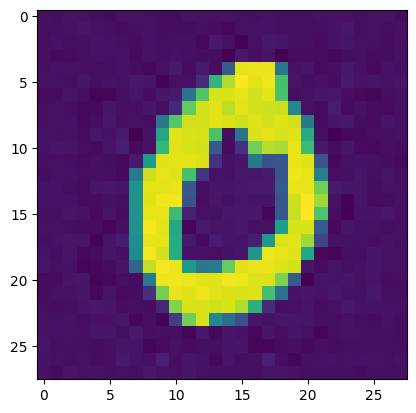

In [8]:
plt.figure()
plt.imshow(mapped_tensor[plot_idx][:28*28].reshape(28, 28).numpy())

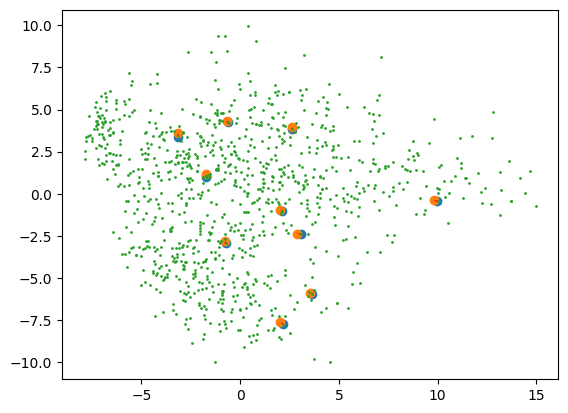

In [9]:
mapped_tensor = map(x_start_tensor).detach()
plot_points = 10

from sklearn.decomposition import PCA


def plot_tensor_projections(x_start_tensor, mapped_tensor, x_target_tensor, plot_points):
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt


    pca = PCA(n_components=2)
    pca.fit(x_target_tensor)
    # Project tensors to 2D using PCA
    x_start_tensor_2 = pca.transform(x_start_tensor)[:plot_points]
    mapped_tensor_2 = pca.transform(mapped_tensor)[:plot_points]
    x_target_tensor_2 = pca.transform(x_target_tensor)

    # Plot the 2D PCA projections and arrows
    fig, ax = plt.subplots()
    ax.scatter(x_start_tensor_2[:,0], x_start_tensor_2[:,1])
    ax.scatter(mapped_tensor_2[:,0], mapped_tensor_2[:,1])
    dx = mapped_tensor_2[:,0]-x_start_tensor_2[:,0]
    dy = mapped_tensor_2[:,1]-x_start_tensor_2[:,1]
    ax.quiver(x_start_tensor_2[:,0], x_start_tensor_2[:,1], dx, dy, scale=1, scale_units='xy', angles='xy', color='r', width=0.005)
    ax.scatter(x_target_tensor_2[:,0], x_target_tensor_2[:,1], s=1)
    plt.show()

# Plot the 2D PCA projections and arrows for the three tensors
plot_tensor_projections(x_start_tensor, mapped_tensor, x_target_tensor, plot_points)

# Testing data

## Testing label

In [10]:
plot_idx = 2
test_tensor = x_start_tensor[plot_idx]
test_truth = x_target_tensor[plot_idx][-1]


for i in range(10):
    test_tensor[-1] = i
    mapped_tensor = map(test_tensor).detach()
    print('before: ', test_tensor[-1], 'after:  ', mapped_tensor[-1], 'truth: ', test_truth)


before:  tensor(0.) after:   tensor(0.0514) truth:  tensor(0.)
before:  tensor(1.) after:   tensor(0.0401) truth:  tensor(0.)
before:  tensor(2.) after:   tensor(0.0302) truth:  tensor(0.)
before:  tensor(3.) after:   tensor(0.0204) truth:  tensor(0.)
before:  tensor(4.) after:   tensor(0.0106) truth:  tensor(0.)
before:  tensor(5.) after:   tensor(0.0011) truth:  tensor(0.)
before:  tensor(6.) after:   tensor(-0.0042) truth:  tensor(0.)
before:  tensor(7.) after:   tensor(-0.0058) truth:  tensor(0.)
before:  tensor(8.) after:   tensor(-0.0020) truth:  tensor(0.)
before:  tensor(9.) after:   tensor(0.0053) truth:  tensor(0.)


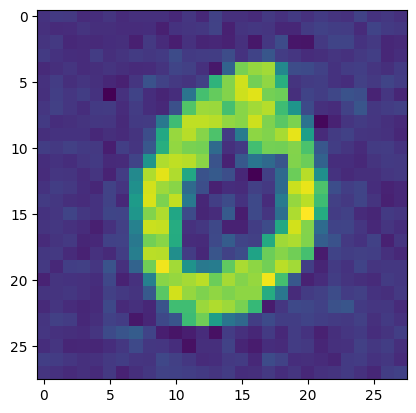

In [11]:
plt.figure()
plt.imshow(mapped_tensor[:28*28].reshape(28, 28).numpy())

In [12]:
plot_idx = 155
test_tensor = x_start_tensor[plot_idx]
test_truth = x_target_tensor[plot_idx][-1]

for i in range(10):
    test_tensor[-1] = i
    mapped_tensor = map(map(test_tensor)).detach()
    print('before: ', test_tensor[-1], 'after:  ', mapped_tensor[-1], 'truth: ', test_truth)

before:  tensor(0.) after:   tensor(-0.1433) truth:  tensor(0.)
before:  tensor(1.) after:   tensor(-0.1549) truth:  tensor(0.)
before:  tensor(2.) after:   tensor(-0.1673) truth:  tensor(0.)
before:  tensor(3.) after:   tensor(-0.1806) truth:  tensor(0.)
before:  tensor(4.) after:   tensor(-0.1914) truth:  tensor(0.)
before:  tensor(5.) after:   tensor(-0.2015) truth:  tensor(0.)
before:  tensor(6.) after:   tensor(-0.2115) truth:  tensor(0.)
before:  tensor(7.) after:   tensor(-0.2202) truth:  tensor(0.)
before:  tensor(8.) after:   tensor(-0.2291) truth:  tensor(0.)
before:  tensor(9.) after:   tensor(-0.2374) truth:  tensor(0.)


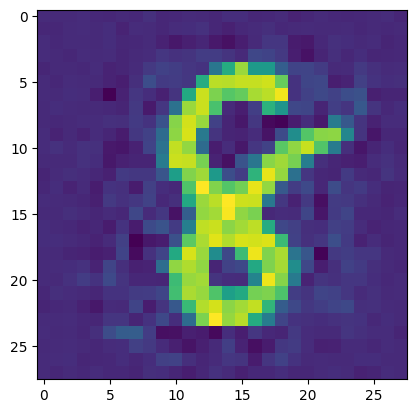

In [13]:
plt.figure()
plt.imshow(mapped_tensor[:28*28].reshape(28, 28).numpy())

## Testing everything

In [14]:
plot_idx = 0
test_tensor = x_start_tensor_test[plot_idx]
test_truth = x_target_tensor_test[plot_idx][-1]

for i in range(10):
    test_tensor[-1] = i
    mapped_tensor = map(map(test_tensor)).detach()
    print('before: ', test_tensor[-1], 'after:  ', mapped_tensor[-1], 'truth: ', test_truth)

NameError: name 'x_start_tensor_test' is not defined

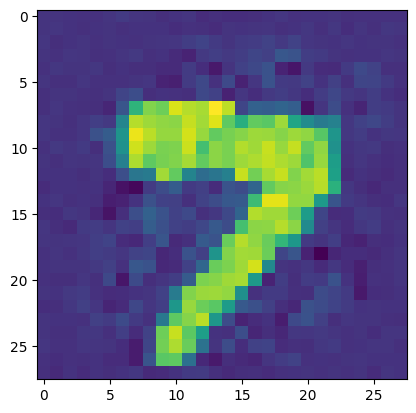

In [ ]:
plt.figure()
plt.imshow(mapped_tensor[:28*28].reshape(28, 28).numpy())

In [ ]:
plot_idx = 1
test_tensor = x_start_tensor_test[plot_idx]
test_truth = x_target_tensor_test[plot_idx][-1]

for i in range(10):
    test_tensor[-1] = i
    mapped_tensor = map(map(test_tensor)).detach()
    print('before: ', test_tensor[-1], 'after:  ', mapped_tensor[-1], 'truth: ', test_truth)

before:  tensor(0.) after:   tensor(-0.0232) truth:  tensor(0.)
before:  tensor(1.) after:   tensor(-0.0063) truth:  tensor(0.)
before:  tensor(2.) after:   tensor(0.0116) truth:  tensor(0.)
before:  tensor(3.) after:   tensor(0.0305) truth:  tensor(0.)
before:  tensor(4.) after:   tensor(0.0497) truth:  tensor(0.)
before:  tensor(5.) after:   tensor(0.0690) truth:  tensor(0.)
before:  tensor(6.) after:   tensor(0.0892) truth:  tensor(0.)
before:  tensor(7.) after:   tensor(0.1112) truth:  tensor(0.)
before:  tensor(8.) after:   tensor(0.1330) truth:  tensor(0.)
before:  tensor(9.) after:   tensor(0.1544) truth:  tensor(0.)


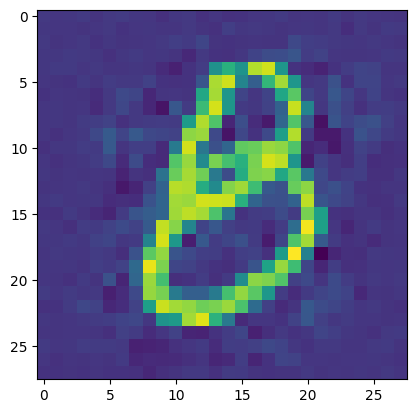

In [ ]:
plt.figure()
plt.imshow(mapped_tensor[:28*28].reshape(28, 28).numpy())